1.4142135623730951

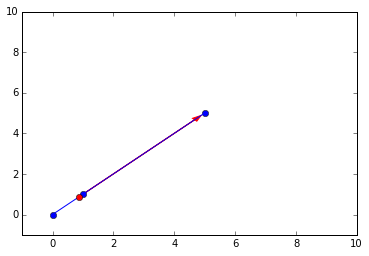

In [16]:
import numpy

P0 = numpy.array([0, 0])
P1 = numpy.array([1, 1])
P2 = numpy.array([5, 5])

def C0(t):
    return (1-t)**2*P0[0] + 2*t*(1-t)*P1[0] + t**2*P2[0]

def C1(t):
    return (1-t)**2*P0[1] + 2*t*(1-t)*P1[1] + t**2*P2[1]

def T(t):
    return -2*(1-t)*P0 + (2-4*t)*P1 + 2*t*P2

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(P0[0], P0[1], "ob")
plt.plot(P1[0], P1[1], "ob")
plt.plot(P2[0], P2[1], "ob")

tspan = numpy.linspace(0, 1)

plt.plot(C0(tspan), C1(tspan))

t_test = 0.3
P_test = [C0(t_test), C1(t_test)]
T_test = T(t_test)

plt.plot(P_test[0], P_test[1], "ro")
plt.arrow(P_test[0], P_test[1], T_test[0], T_test[1], color="red", width=0.01)
plt.xlim(-1, 10)
plt.ylim(-1, 10)

numpy.linalg.norm(P0-2*P1+P1)

(0, 1000)

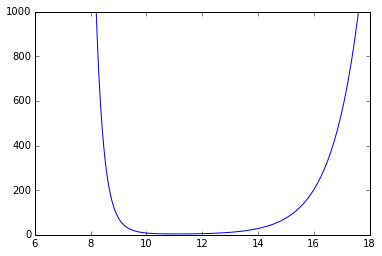

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

h0 = 10
hmin = 9
hmax = 14

@numpy.vectorize
def heightenergy(h):
    dh = h-h0
    return 0.5*(numpy.exp(dh/(hmax-h0)) + numpy.exp(dh/(hmin-h0)))**4

xspan = numpy.linspace(6, 18, 200)
plt.plot(xspan, heightenergy(xspan))
plt.ylim(0, 1000)


In [60]:
import scipy.integrate

def C(t, P0, P1, P2):
    return (1-t)**2*P0 + 2*t*(1-t)*P1 + t**2*P2

def T(t, P0, P1, P2):
    return -2*(1-t)*P0 + (2-4*t)*P1 + 2*t*P2

def bezier_integrate(p, f):
    def f_(t):
        dl = numpy.linalg.norm(T(t, p[0], p[1], p[2]))
        return f(t)*dl
    return scipy.integrate.quad(f_, 0, 1)[0]

P0 = numpy.array([0, 0])
P1 = numpy.array([0, 1])
P2 = numpy.array([1, 1])

#print(bezier_integrate([P0, P1, P2], lambda t: C(t, P0, P1, P2)[0])*4)
print(bezier_integrate([P0, P1, P2], lambda t: 1))


1.6232252401402305


In [59]:
P0 = numpy.array([0, 0])
P1 = numpy.array([0, 1])
P2 = numpy.array([1, 1])

def length(P0, P1, P2):
    db0 = P1-P0
    db1 = P2-P1
    db2 = P0-P2

    sqrnorm = lambda x:x.dot(x)
    norm = numpy.linalg.norm

    def Lambda(alpha):
        return alpha*sqrnorm(db0) + (1.-alpha)*sqrnorm(db1) - 1./4*sqrnorm(db2)

    l14 = Lambda(1./4)
    l34 = Lambda(3./4)
    l12 = Lambda(1./2)

    a = (l14*norm(db1) + l34*norm(db0))/(2*l12)
    b = numpy.cross(db0, db1)**2/(8*l12**(3./2))
    c = numpy.log(l14 + norm(db1)*numpy.sqrt(l12))
    d = numpy.log(-l34 + norm(db0)*numpy.sqrt(l12))
    
    return a + b*(c-d)



1.6232252401402305

In [78]:
P0 = numpy.array([0, 0])
P1 = numpy.array([0.5, 0.5])
P2 = numpy.array([1, 1])

def bending_energy(P0, P1, P2):
    db0 = P1-P0
    db1 = P2-P1
    db2 = P0-P2

    sqrnorm = lambda x:x.dot(x)
    norm = numpy.linalg.norm

    def Lambda(alpha):
        return alpha*sqrnorm(db0) + (1.-alpha)*sqrnorm(db1) - 1./4*sqrnorm(db2)

    l14 = Lambda(1./4)
    l34 = Lambda(3./4)
    l12 = Lambda(1./2)
    
    c = 2./(3*numpy.cross(db0, db1)**2)
    print(3*numpy.cross(db0, db1)**2)
    A = l14*(3*l12*sqrnorm(db1) - l14**2)/norm(db1)**3
    B = l34*(3*l12*sqrnorm(db0) - l34**2)/norm(db0)**3
    
    return c*(A + B)

print(bending_energy(P0, P1, P2))

0.0
nan


/usr/lib/python3.4/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/lib/python3.4/site-packages/IPython/kernel/__main__.py:25: RuntimeWarning: invalid value encountered in double_scalars


Bending energy
----------------

$$
    E_\mathrm{Bend} = \sum_i E_\mathrm{Bend}^{(i)}
$$
$$
    E_\mathrm{Bend}^{(i)}
        = \frac{1}{2} \int_0^L \kappa^2(f(s)) \mathrm{d}s
        = \frac{1}{2} \int_0^1 \kappa^2(q(t)) \mathrm{d}t
$$


Height energy
---------------

$$
    E_\mathrm{Height}
        = \sum_i \int_0^L \omega(h(s)) \mathrm{d}s
        = \sum_i \int_0^L \omega(h(t)) \frac{\mathrm{d}s}{\mathrm{d}t} \mathrm{d}t
        = \sum_i \int_0^L \omega(h(t)) ||q'(t)|| \mathrm{d}t
$$
$$
    \omega_{h_0}(h) = \frac{1}{2} \Big(e^\frac{h-h_0}{h_{max}-h_0} + e^\frac{h-h_0}{h_{min}-h_0}\Big)^4
$$


Repulsive energy
-------------------

$$
    E_\mathrm{Repulsive} = \sum_i \frac{l_0}{l^{(i)}}
$$


In [ ]:
0.5*(numpy.exp(dh/(hmax-h0)) + numpy.exp(dh/(hmin-h0)))**4